In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [3]:
X_train = np.loadtxt('./Dataset/input.csv', delimiter = ',')
Y_train = np.loadtxt('./Dataset/labels.csv', delimiter = ',')

X_test = np.loadtxt('./Dataset/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('./Dataset/labels_test.csv', delimiter = ',')

In [4]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [14]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", X_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 100, 100, 3)


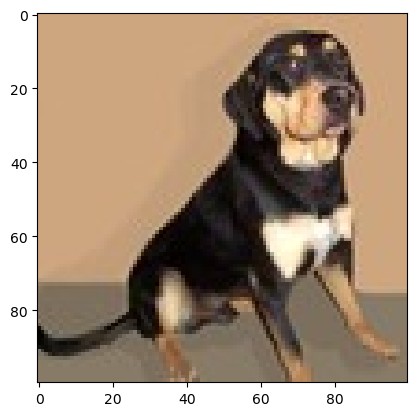

In [5]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

Model

In [6]:
model = Sequential([
    # first para -> number of filters
    # second para -> size of filters
    # you can also meniton the stride (def = 1) in the MaxPooling fct
    # you only need to include the input shape in the first layer
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)), 
    MaxPooling2D((2,2)), 

    Conv2D(32, (3,3), activation = 'relu'), 
    MaxPooling2D((2,2)), 
    
    Flatten(), 
    #64 is the number of neurons we want this layer to have
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
    # for binary classification we only need one output neuron
])

In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 8s 241ms/step - loss: 0.2097 - accuracy: 0.9145
Epoch 2/5
32/32 [==============================] - 11s 339ms/step - loss: 0.2021 - accuracy: 0.9270
Epoch 3/5
32/32 [==============================] - 11s 336ms/step - loss: 0.1513 - accuracy: 0.9505
Epoch 4/5
32/32 [==============================] - 10s 322ms/step - loss: 0.1078 - accuracy: 0.9700
Epoch 5/5
32/32 [==============================] - 14s 445ms/step - loss: 0.0837 - accuracy: 0.9810


In [12]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 52ms/step - loss: 1.0655 - accuracy: 0.6950


[1.0655437707901, 0.6949999928474426]

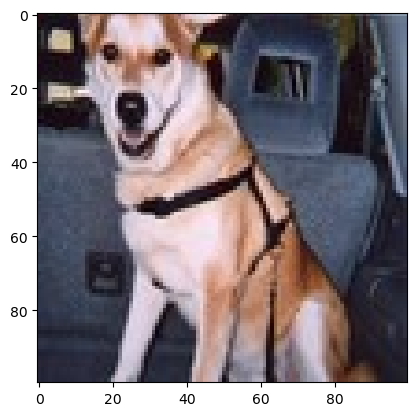

1/1 [==============================] - 0s 21ms/step
Our model says it is a : dog


In [29]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
#print(y_pred) # just gives you the probability

y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)